## Import libraries :

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Insuline variable clearly seems off.
- There are no null values in this dataset.

In [5]:
types = pd.DataFrame({'Nulls': data.isnull().any(),
                      'mean' : round(data.mean(), 3),
                      'unique_values' : data.nunique(),       # Total unique values each column has.
                      'howmany_zeros' :(data == 0).sum(),     # Count of zeros w.r.t columns. 
                      'datatypes': data.dtypes,
                     })
types.style.highlight_max(axis = 0, color = 'lightgreen')

,Nulls,mean,unique_values,howmany_zeros,datatypes
Pregnancies,False,3.845000,17,111,int64
Glucose,False,120.895000,136,5,int64
BloodPressure,False,69.105000,47,35,int64
SkinThickness,False,20.536000,51,227,int64
Insulin,False,79.799000,186,374,int64
BMI,False,31.993000,248,11,float64
DiabetesPedigreeFunction,False,0.472000,517,0,float64
Age,False,33.241000,52,0,int64
Outcome,False,0.349000,2,500,int64


In [6]:
types.sort_values(by = 'howmany_zeros')

,Nulls,mean,unique_values,howmany_zeros,datatypes
DiabetesPedigreeFunction,False,0.472,517,0,float64
Age,False,33.241,52,0,int64
Glucose,False,120.895,136,5,int64
BMI,False,31.993,248,11,float64
BloodPressure,False,69.105,47,35,int64
Pregnancies,False,3.845,17,111,int64
SkinThickness,False,20.536,51,227,int64
Insulin,False,79.799,186,374,int64
Outcome,False,0.349,2,500,int64


In [7]:
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


## Check correlation :

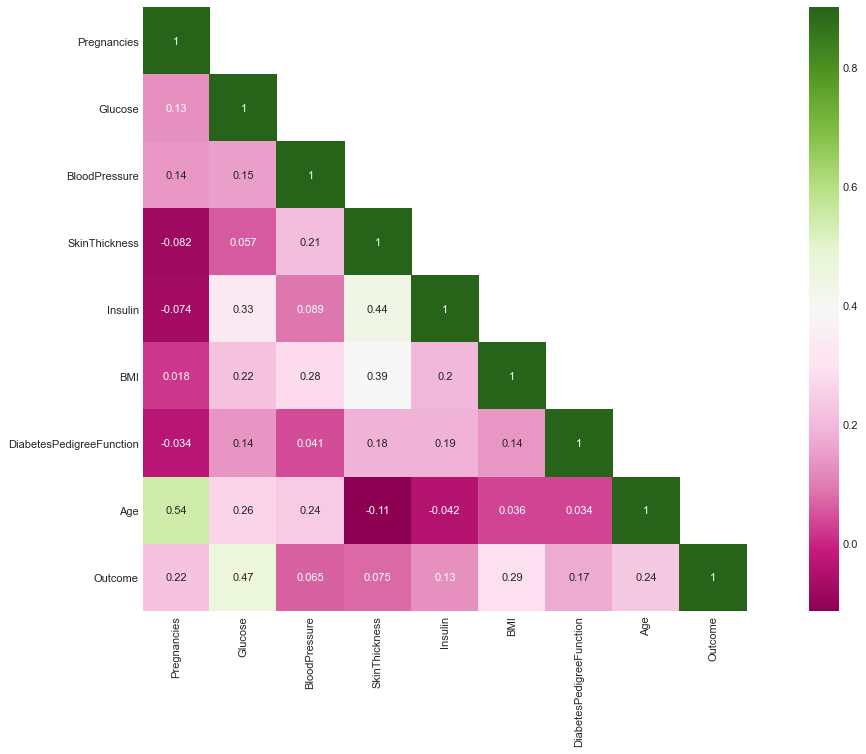

In [8]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False;
# -----------------------------------------------------------------------------------
plt.figure(figsize = (20, 10), dpi = 80)
sns.heatmap(corr, mask = mask, square = True, annot = True, vmax = .9, cmap = 'PiYG');

In [9]:
# sns.pairplot(data, palette = 'PiYG_r', hue = 'Outcome');

## Outliers :

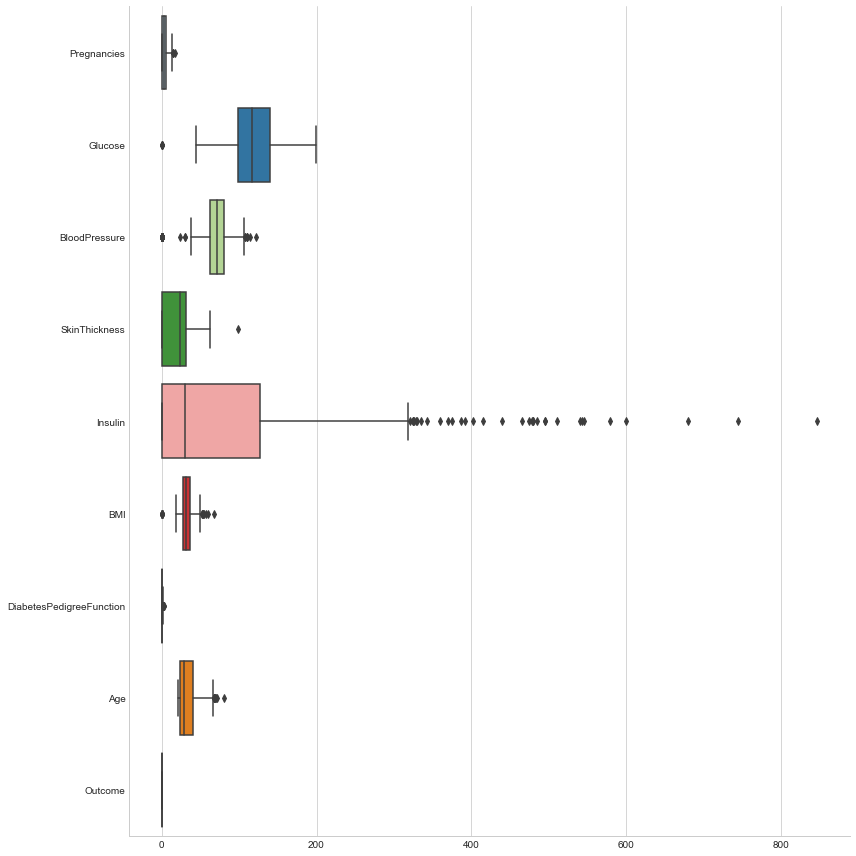

In [10]:
sns.catplot(data = data, kind = 'box', orient = 'h', height=12, aspect=1, palette = 'Paired');

- Huge outlier in __Insulin__ variable.
- Followed by Bloodpressure, BMI, etc. 
- Diagram says the rest.

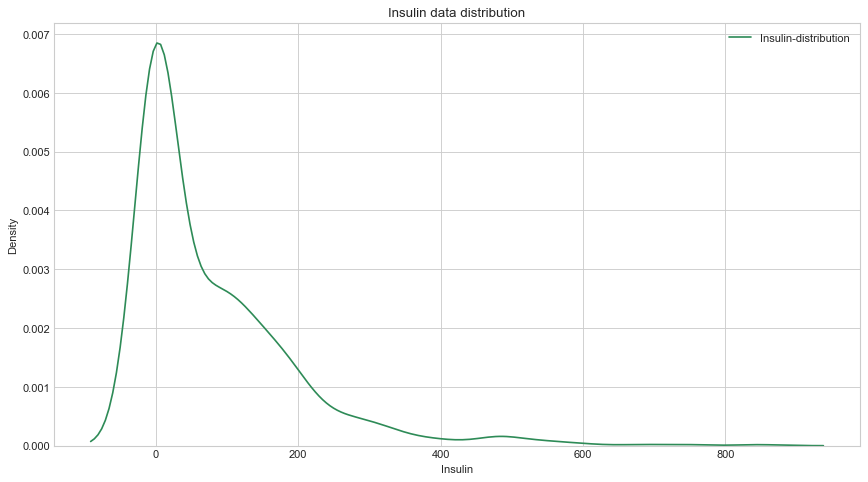

In [11]:
## ------------------------------- Insuline data ------------------------------- ## 
plt.figure(figsize=(13,7), dpi=80);
sns.distplot(data['Insulin'], hist = False, color = 'seagreen')
plt.title('Insulin data distribution')
plt.legend(['Insulin-distribution']);

- Insuline data looks pretty much skewed.
- It is right skewed.
- We cannot show normalized data by taking log since it has NaN or 0 values. - refere above table. 
- log of zero = infinity.

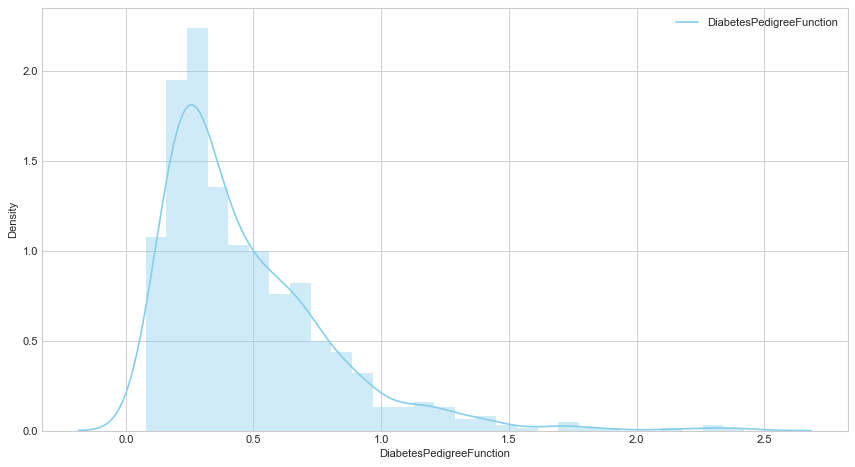

In [12]:
## ------------------------------- DiabetesPedigreeFunction data ------------------------------- ## 
plt.figure(figsize = (13,7), dpi = 80)
sns.distplot(data['DiabetesPedigreeFunction'], color = 'skyblue')
plt.legend(['DiabetesPedigreeFunction']);

- Data looks right skewed.
- Try to normalize it.

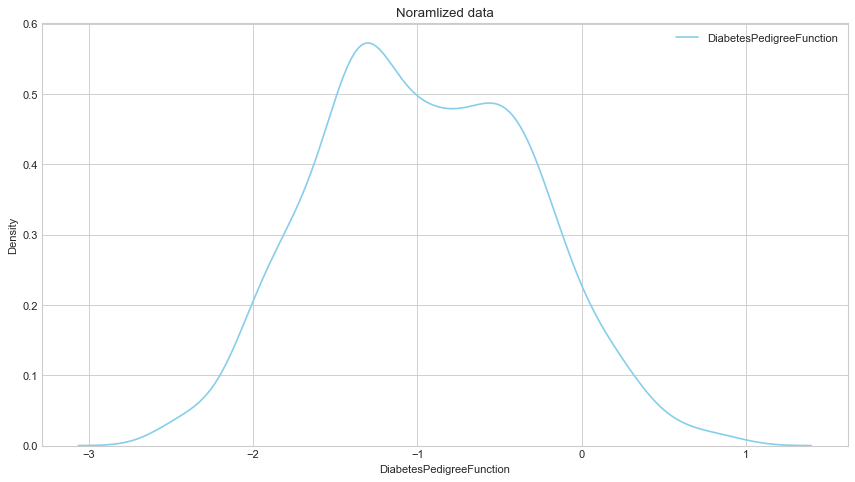

In [13]:
plt.figure(figsize = (13,7), dpi = 80 )
sns.distplot(np.log(data['DiabetesPedigreeFunction']), hist = False, color = 'skyblue')
plt.title('Noramlized data')
plt.legend(['DiabetesPedigreeFunction']);

## Model Building :

In [14]:
print(list(data.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [15]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [16]:
x = data[features]
y = data['Outcome']

In [17]:
## --------------------------------------- Import model building libraries ---------------------------------------

from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB

In [18]:
train_inputs, val_inputs, train_targets, val_targets = tts(x, y, test_size = .20, random_state = 42)

In [19]:
train_inputs.shape, train_targets.shape

((614, 8), (614,))

In [20]:
# --------------------------------------- fit the model -----------------------------------------------

gnbmodel = GaussianNB().fit(train_inputs, train_targets)

# ------------------------------------- train predictions ----------------------------------------------

train_preds = gnbmodel.predict(train_inputs)
train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
train_acc = gnbmodel.score(train_inputs, train_preds)

print(f'Train RMSE : {round(train_rmse, 3)}')
print(f'Train Accuracy : {round(train_acc, 3)}')

print('-'*30)

# ---------------------------------------- Validation predictions --------------------------------------

val_preds = gnbmodel.predict(val_inputs)
val_rmse = mean_squared_error(val_targets, val_preds, squared = False)
val_acc = gnbmodel.score(val_inputs, val_preds)

print(f'Validation RMSE : {round(val_rmse, 3)}')
print(f'Valdation accuracy : {round(val_acc, 3)}')

Train RMSE : 0.498
Train Accuracy : 1.0
------------------------------
Validation RMSE : 0.483
Valdation accuracy : 1.0
